<a href="https://colab.research.google.com/github/clarentcelsia/PyML/blob/master/deeplearning/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN GRU LSTM 

RNN (Recurrent Neural Network) is type of ANN commonly used in Speech Recognition and NLP, because RNN recognize *data's sequential characteristic* and use patterns to predict next scenario. e.g Predict what will your next word to type.

<img src="https://cdn.ttgtmedia.com/rms/onlineimages/enterpriseai-recurrent_neural_network-f_mobile.png" width=350> </img>

LSTM and GRU is a RNN architecture.

GRU has 2 gates which are reset and update while LSTM has 3 gates, input, output, and forget.

GRU is less complex than LSTM because it only has 2 gates, less than LSTM. Ideally used for small dataset, while LSTM for larger dataset.

In [ ]:
!nvidia-smi

# Predict The Stock using RNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Proa-ML/Week7/assignment/Google_Stock_Price_Train.csv", parse_dates=['Date'], index_col='Date')
df_test = pd.read_csv("/content/drive/MyDrive/Proa-ML/Week7/assignment/Google_Stock_Price_Test.csv", parse_dates=['Date'], index_col='Date')

In [4]:
df_train.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# Check Training Set Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [6]:
# Convert Close and Volume to float type
# df_train['Close'] = pd.to_numeric(df_train['Close'].astype(str).str.replace(",",""), downcast='float') float32

df_train['Close'] = df_train['Close'].astype(str).str.replace(",","").astype(float)
df_train['Volume'] = df_train['Volume'].astype(str).str.replace(",","").astype(float)
print(df_train.info())

df_test['Close'] = df_test['Close'].astype(str).str.replace(",","").astype(float)
df_test['Volume'] = df_test['Volume'].astype(str).str.replace(",","").astype(float)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes
None


In [7]:
df_train.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [8]:
# Check if there's data Nan
print(df_train.isna().sum())
print(df_test.isna().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [9]:
# Check both of data has no null value
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [10]:
# Find data based on dates
df_train[:'2012-01-10'] # [:'2012-01-10'] = index

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0
2012-01-10,313.70,315.72,307.30,621.43,8824000.0


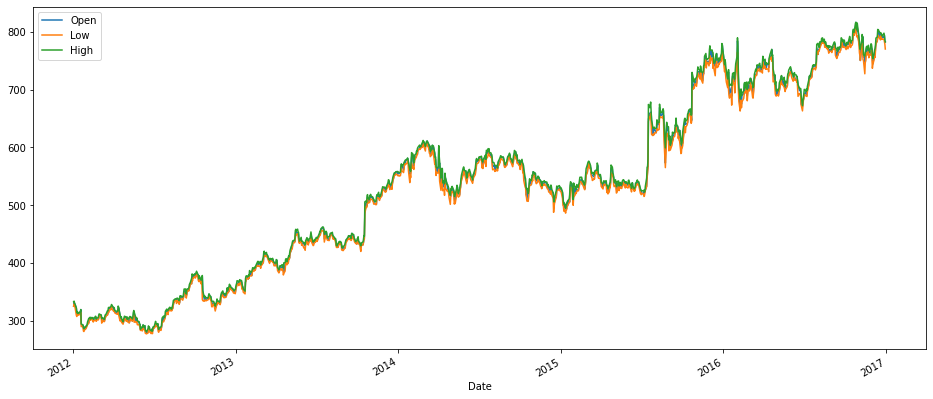

In [11]:
# sns.countplot(data=df_train).set(title="Training data") # Bar Histogram
df_train[['Open','Low','High']].plot(figsize=(16,7)) # Plot only 3 features

In [12]:
train = df_train.iloc[:, 0:1].values # array
train.shape

(1258, 1)

In [13]:
# Normalize using MinMaxScaller [-1, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = scaler.fit_transform(train)

print(train[:5, :])
train.shape

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


(1258, 1)

In [14]:
# In this case, we just predict the stock price based on its 'Open' feature
X_train = [] # >>> 1198 data
y_train = []
for i in range(60, len(df_train)):
    X_train.append(train[i-60:i, 0]) # takes 60 x_train; r[0-59]c[0] (INPUT)
    y_train.append(train[i, 0]) # takes r[60]c[0] as (OUTPUT) for stock price ahead to predict

X_train, y_train = np.array(X_train), np.array(y_train) 
print("Input 1 : ", train[0:60, 0])  
print("Output 1 : ", train[60,0])

print(X_train.shape) # 1198 list, 60 rows for each list, with 1 features/cols for each row  
print(y_train.shape) # Each 1198 lists in X_train represented by 1 output -> 1198 output for each feature(1) -> (1198,)

Input 1 :  [0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
Output 1 :  0.08627874097775134
(1198, 60)
(1198,)


In [15]:
# Check size of train data before reshaping
X_train.size

71880

In [16]:
# Reshape array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 1198 * 60 * 1 = size
X_train.shape

(1198, 60, 1)

In [17]:
# Check current training set dimension
print("x : ", X_train.shape[0])
print("y : ", X_train.shape[1])
print("z : ", X_train.shape[2])

x :  1198
y :  60
z :  1


In [18]:
y_train.shape # 1198 output for each feature(1) 

(1198,)

# Build RNN Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
# Note: replace LSTM with GRU or RNN if you want to try those
model = Sequential(layers=[
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)), # >>> 2D input(1 list contains = 60 data [with 1 feature], 64 output [return_seq true]), output 3D
    Dropout(0.2), # prevent overfitting
    LSTM(units=128, return_sequences=True), # >>> None, 60, 50
    Dropout(0.2), # prevent overfitting
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    LSTM(units=128), # None, 50
    Dropout(0.2),
    Dense(name="output", units=1), # None, 1 -> 2D output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               1

**return sequences (def=false):** return all hidden states == x

**return state (def=false):** return last cell state to the output == y

if you’re working with a multi-layer LSTM (Stacked LSTMs), you will have to set return_sequences = True, because you need the entire series of hidden states to *feed forward* into each successive LSTM layer / cell.

for cell state, if you want an output of same dimensions as your input, entire time-series with the same number of time-step, then it’s True, but if you’re expecting only a representation for the last time-step, then it’s False

In [21]:
# from keras.callbacks import EarlyStopping
# early = EarlyStopping(monitor='accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

model.fit(X_train, y_train, epochs=80, batch_size = 32)

Epoch 1/80
38/38 [==============================] - 17s 250ms/step - loss: 0.0380 - accuracy: 8.3472e-04
Epoch 2/80
38/38 [==============================] - 10s 261ms/step - loss: 0.0038 - accuracy: 0.0017
Epoch 3/80
38/38 [==============================] - 9s 246ms/step - loss: 0.0035 - accuracy: 0.0017
Epoch 4/80
38/38 [==============================] - 9s 246ms/step - loss: 0.0032 - accuracy: 0.0017
Epoch 5/80
38/38 [==============================] - 9s 249ms/step - loss: 0.0034 - accuracy: 0.0017
Epoch 6/80
38/38 [==============================] - 10s 251ms/step - loss: 0.0032 - accuracy: 0.0017
Epoch 7/80
38/38 [==============================] - 9s 250ms/step - loss: 0.0035 - accuracy: 0.0017
Epoch 8/80
38/38 [==============================] - 9s 248ms/step - loss: 0.0030 - accuracy: 0.0017
Epoch 9/80
38/38 [==============================] - 10s 255ms/step - loss: 0.0030 - accuracy: 0.0017
Epoch 10/80
38/38 [==============================] - 10s 249ms/step - loss: 0.0030 - accurac

# Making Prediction

In [22]:
test = df_test.iloc[:, 0]

In [23]:
# Getting the predicted stock price of 2018
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0) # all the data stock is into be one
print(df_total)
print()
print(len(df_train))
print(len(df_test))
print(len(df_total))

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2017-01-25    829.62
2017-01-26    837.81
2017-01-27    834.71
2017-01-30    814.66
2017-01-31    796.86
Name: Open, Length: 1278, dtype: float64

1258
20
1278


In [24]:
test_inputs = df_total[X_train.shape[0]:].values #getting input of each previous financial days [1198, 1199,..., 1278]
test_inputs.shape # 80 rows, has 1 feature for each of row (80,)

(80,)

In [25]:
test_inputs = test_inputs.reshape(-1, 1)
print(test_inputs[0])

test_inputs = scaler.transform(test_inputs) # before, we have already fit training data into scaler. For test just adjusting testing data to scaler setting
print(test_inputs[0])

[779.]
[0.9299055]


In [26]:
X_test = []
for i in range(60, len(test_inputs)):
    X_test.append(test_inputs[i-60:i, 0]) # test_inp r[0-59]c[0]

X_test = np.array(X_test)  
print(X_test.size) # 6000 data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # (20 lists, 60 rows for each list with 1 feature for each row)
X_test.shape

1200


(20, 60, 1)

In [27]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price.shape
# When you scale your data, it will take the minmax of each field and transform it into 0 to 1 values.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

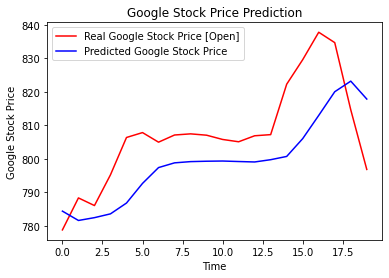

In [28]:
# Visualising the results
plt.plot(test.values, color = 'red', label = 'Real Google Stock Price [Open]')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [29]:
# plt.plot(test['Low'].values, color = 'red', label = 'Real Google Stock Price [Low]')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
# plt.legend()
# plt.show()

In [30]:
# plt.plot(test['High'].values, color = 'red', label = 'Real Google Stock Price [High]')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
# plt.legend()
# plt.show()

In [31]:
# plt.plot(test['Close'].values, color = 'red', label = 'Real Google Stock Price [Close]')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
# plt.legend()
# plt.show()

In [32]:
# plt.plot(test['Volume'].values, color = 'red', label = 'Real Google Stock Price [Open]')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
# plt.legend()
# plt.show()